In [200]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import xarray as xr
import pickle
import time
import datetime
from salishsea_tools import viz_tools
%matplotlib inline
#%matplotlib qt

In [201]:
grid = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSnBathymetryV17-02").sel(gridX = slice(10, 364), gridY = slice(200, 739))

In [202]:
nemo_mask =xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSn2DMeshMaskV17-02").tmaskutil.sel(gridX = slice(10, 364), gridY = slice(200, 739)) 

In [203]:
lat = grid.latitude
lon = grid.longitude

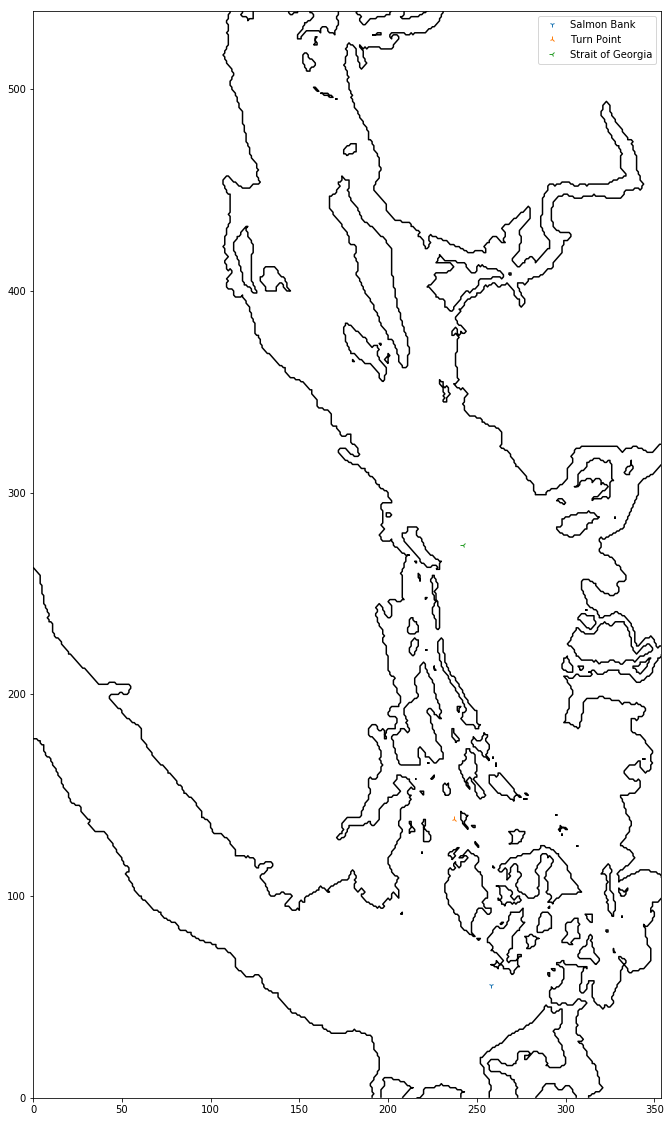

In [212]:
fig = plt.figure(figsize = (20,20))
ax = plt.subplot(111)
ax.contour(nemo_mask.isel(time=0).values, levels=[-1,1], colors= "k")
viz_tools.set_aspect(ax)
ax.plot([258],[56],"1", label="Salmon Bank")
ax.plot([237], [138], "2", label = 'Turn Point')
ax.plot([242], [274], "3", label = 'Strait of Georgia')
ax.legend()

In [205]:
mask_array = nemo_mask.isel(time=0).values

In [207]:
salmon_lat = lat.values[56][258]
turn_lat = lat.values[138][237]
sog_lat = lat.values[274][242]
salmon_lon = lon.values[56][258]
turn_lon = lon.values[138][237]
sog_lon = lon.values[274][242]

In [208]:
salmon_coords = (salmon_lat, salmon_lon)
turn_coords = (turn_lat, turn_lon)
sog_coords = (sog_lat, sog_lon)

In [209]:
print(salmon_coords)

(48.38138198852539, -122.85613250732422)


In [210]:
print(turn_coords)

(48.66575622558594, -123.23974609375)


In [211]:
print(sog_coords)

(49.21060562133789, -123.66905975341797)


In [213]:
nemo_mask

<xarray.DataArray 'tmaskutil' (time: 1, gridY: 540, gridX: 355)>
[191700 values with dtype=int8]
Coordinates:
  * time     (time) datetime64[ns] 2014-09-12T00:30:00
  * gridY    (gridY) int16 200 201 202 203 204 205 ... 734 735 736 737 738 739
  * gridX    (gridX) int16 10 11 12 13 14 15 16 ... 358 359 360 361 362 363 364
Attributes:
    _ChunkSizes:            [  1 898 398]
    content_coverage_type:  modelResult
    flag_meanings:          land, water
    flag_values:            0, 1
    ioos_category:          grid_parameter
    long_name:              dry land mask for T-grid and W-grid
    standard_name:          tmaskutil